In [78]:
# data set path 
path = "D:\Self_Train\Step2_Project\Titanic"
training_org  = r"\train.csv"
test_org = r"\test.csv"
result = r"\gender_submission.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [49]:
train_data = pd.read_csv(path+training_org,index_col = 'PassengerId')
test_data = pd.read_csv(path+test_org,index_col = 'PassengerId')
test_result = pd.read_csv(path+result,index_col = 'PassengerId')

In [4]:
train_data.info( )

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

# First Data Analyse 
* Visualization
* Observation
* Cleaning (missing value, abnoraml values) 
* Featire selection (first selection, drop the useless or obviously non-related) 


** (train_data, test_data)

In [8]:
# Continuous (numeracal feature) data describe
train_data[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [9]:
test_data[['Age', 'Fare']].describe()

,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


# Feature Fare
* Abnormal fare information
* missing information (only on test set)

on train set and test set

Fare mean is 32.204
Fare median is 14.454
Fare quantile 25% is 7.910
Fare quantile 75% is 31.000
Fare max is 512.329
Fare & Survived


,Fare
Survived,
0,22.117887
1,48.395408


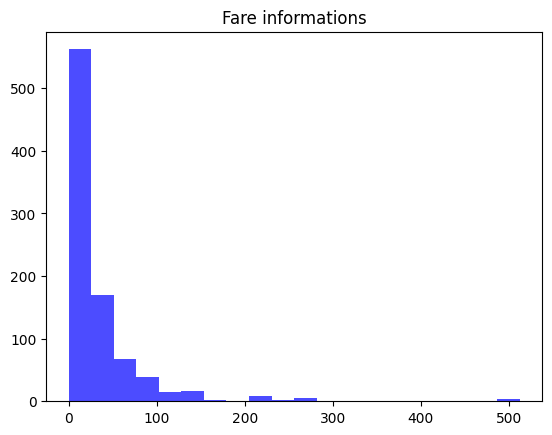

In [10]:
# Fare _ train set
plt.hist(train_data.Fare, bins = 20, color = 'blue', alpha = 0.7)
plt.title('Fare informations');
'''
                 Fare
Survived	
   0	       22.117887
   1	       48.395408
'''
print('Fare mean is {:.3f}'.format(train_data.Fare.mean()))
print('Fare median is {:.3f}'.format(train_data.Fare.median()))
print('Fare quantile 25% is {:.3f}'.format(train_data.Fare.quantile(0.25)))
print('Fare quantile 75% is {:.3f}'.format(train_data.Fare.quantile(0.75)))
print('Fare max is {:.3f}'.format(train_data.Fare.max()))
print('Fare & Survived')
train_data[['Fare','Survived']].groupby('Survived').mean()

In [11]:
fagg = {'Fare': ['min','max','mean']}
train_data.groupby('Pclass').agg(fagg)

Fare                     
        min       max       mean
Pclass                          
1       0.0  512.3292  84.154687
2       0.0   73.5000  20.662183
3       0.0   69.5500  13.675550

In [12]:
train_data[train_data['Fare']==0].sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S
675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [13]:
#### Trait the Fare information (train_data)
# some fare is zero for class 1, 2 and 3
# use the mean value to replace the 0s
mean_pclass1 = train_data[train_data['Pclass']==1]['Fare'].mean()
mean_pclass2 = train_data[train_data['Pclass']==2]['Fare'].mean()
mean_pclass3 = train_data[train_data['Pclass']==3]['Fare'].mean()
print('mean fare of class 1, 2, 3 are: {:.2f}, {:.2f}, {:.2f}'.format(mean_pclass1,
                                                                     mean_pclass2,
                                                                     mean_pclass3))
train_data.loc[(train_data['Pclass']==1) & (train_data['Fare']==0)] = train_data.loc[(train_data['Pclass']==1) & (train_data['Fare']==0)].replace({'Fare':0},mean_pclass1)
train_data.loc[(train_data['Pclass']==2) & (train_data['Fare']==0)] = train_data.loc[(train_data['Pclass']==2) & (train_data['Fare']==0)].replace({'Fare':0},mean_pclass2)
train_data.loc[(train_data['Pclass']==3) & (train_data['Fare']==0)] = train_data.loc[(train_data['Pclass']==3) & (train_data['Fare']==0)].replace({'Fare':0},mean_pclass3)

mean fare of class 1, 2, 3 are: 84.15, 20.66, 13.68


In [14]:
#### Trait the Fare information (test_data)
# fare is zero for class 1
# use the mean value to replace the 0s
print('original test set Fare informations:')
display(test_data[['Fare','Pclass']].groupby('Pclass').agg(fagg))

mean_pclass1_test = test_data[test_data['Pclass']==1]['Fare'].mean()

print('mean fare of class 1 is: {:.2f}'.format(mean_pclass1_test))
test_data.loc[(test_data['Pclass']==1) & (test_data['Fare']==0)] = test_data.loc[(test_data['Pclass']==1) & (test_data['Fare']==0)].replace({'Fare':0},mean_pclass1_test)
print('after replace by mean fare value test set:')
display(test_data[['Fare','Pclass']].groupby('Pclass').agg(fagg))

original test set Fare informations:


Fare                     
           min       max       mean
Pclass                             
1       0.0000  512.3292  94.280297
2       9.6875   73.5000  22.202104
3       3.1708   69.5500  12.459678

mean fare of class 1 is: 94.28
after replace by mean fare value test set:


Fare                     
            min       max       mean
Pclass                              
1       25.7000  512.3292  96.042546
2        9.6875   73.5000  22.202104
3        3.1708   69.5500  12.459678

In [15]:
test_data[test_data['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [17]:
# only one Fare has missing value 
#  replace by mean value

mean_pclass3_test = test_data[test_data['Pclass']==3]['Fare'].mean()

print('mean fare of class 3 is: {:.2f}'.format(mean_pclass3_test))
test_data['Fare'].fillna(mean_pclass3_test,inplace = True)

mean fare of class 3 is: 12.46


In [18]:
test_data.loc[1044,:]

Pclass                       3
Name        Storey, Mr. Thomas
Sex                       male
Age                       60.5
SibSp                        0
Parch                        0
Ticket                    3701
Fare                 12.459678
Cabin                      NaN
Embarked                     S
Name: 1044, dtype: object

In [19]:
# to be used in data preparation later 
# if the model needs "dichotomizing discretizations" 
fare_bins = [0,20,40,60,80,520]
fare_labels = ['low','normal','expensive','expensive+','expensive++']

## Conclusion for Fare: 
    There is no abnormal value in Fare, but some of the fare is strange...
    like first class has 5 and 3rd class has 69.55 

    Maybe just drop this feature in the future modelling, there is a 
    relationship between Fare and Pclass, but not clair for the moment

# Feature Age
* Missing value : replace by mean

on train set and test set

Age mean is 29.699
Age median is 28.000
Age quantile 25% is 20.125
Age quantile 75% is 38.000
Age max is 80.000
Age & Survived


,Age
Survived,
0,30.626179
1,28.343690


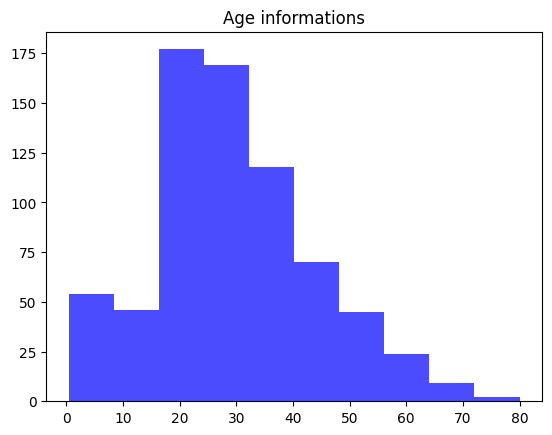

In [20]:
# Age
plt.hist(train_data.Age, bins = 10, color = 'blue', alpha = 0.7)
plt.title('Age informations');
print('Age mean is {:.3f}'.format(train_data.Age.mean()))
print('Age median is {:.3f}'.format(train_data.Age.median()))
print('Age quantile 25% is {:.3f}'.format(train_data.Age.quantile(0.25)))
print('Age quantile 75% is {:.3f}'.format(train_data.Age.quantile(0.75)))
print('Age max is {:.3f}'.format(train_data.Age.max()))
print('Age & Survived')
train_data[['Age','Survived']].groupby('Survived').mean()

In [21]:
# fill na about 20% missing values in 'age' (train_data)
print('the mean of age in train set is: {:3.2f}'.format(train_data['Age'].mean()))
train_data.loc[:,'Age']= train_data['Age'].fillna(train_data['Age'].mean())
train_data.isna().sum()

the mean of age in train set is: 29.70


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [22]:
# fill na about 20% missing values in 'age' (test_data)
print('the mean of age in train set is: {:3.2f}'.format(test_data['Age'].mean()))
test_data.loc[:,'Age']= test_data['Age'].fillna(test_data['Age'].mean())
test_data.isna().sum()

the mean of age in train set is: 30.27


Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [23]:
# to be used in data preparation later
age_bin = [0,15,30,50,100]
age_labels = ['teenager','adult','adult+','aged']

# Feature Pclass, SibSp, Parch
* No missing values

In [24]:
def count_quantities(data, variables):
    '''
    Function to count quantities for non-continuous data
    :param variables: list of variable 
    :param data: data source 
    :return: list of count results (count_list)  
    :return: dictionary of count results (d_count) 
    '''
    count_list = []
    d_count = dict()
    for i in variables:
        count_list.append(data[i].value_counts())
    for name, count in zip(variables, count_list):
        d_count[name] = count
    return count_list,d_count

counts = ['Pclass', 'SibSp', 'Parch']
values,dic = count_quantities(train_data,counts)
pclass = pd.DataFrame(values[0])
print('Pclass, SibSp, Parch counting informations: ')
for i in range(len(counts)): 
    print(pd.DataFrame(values[i]))
# pd.DataFrame(dic)  

Pclass, SibSp, Parch counting informations: 
        count
Pclass       
3         491
1         216
2         184
       count
SibSp       
0        608
1        209
2         28
4         18
3         16
8          7
5          5
       count
Parch       
0        678
1        118
2         80
5          5
3          5
4          4
6          1


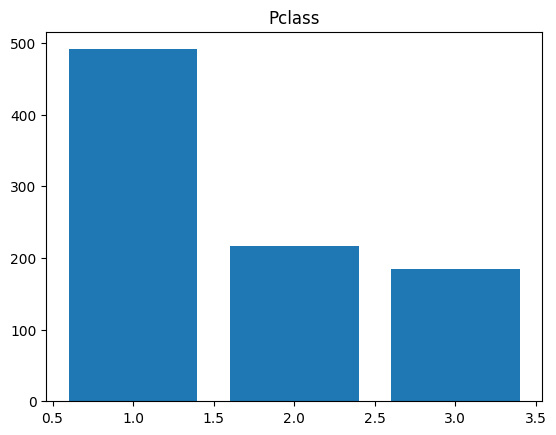

In [25]:
plt.bar([1,2,3],values[0])
plt.title('Pclass');

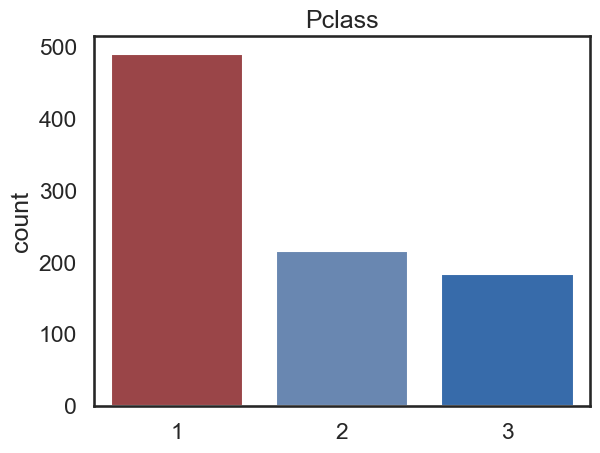

In [26]:
sns.set_theme(style='white', context = 'talk')
ax = sns.barplot(x = [1,2,3], y=values[0],hue = values[0], palette = "vlag",legend = False)
ax.set_title('Pclass');

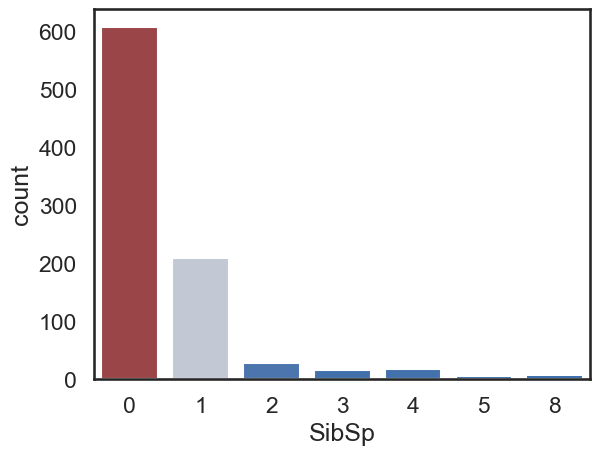

In [27]:
sns.barplot(x = values[1].index, y=values[1],hue = values[1], palette = "vlag",legend = False)
ax.set_title('SibSp');

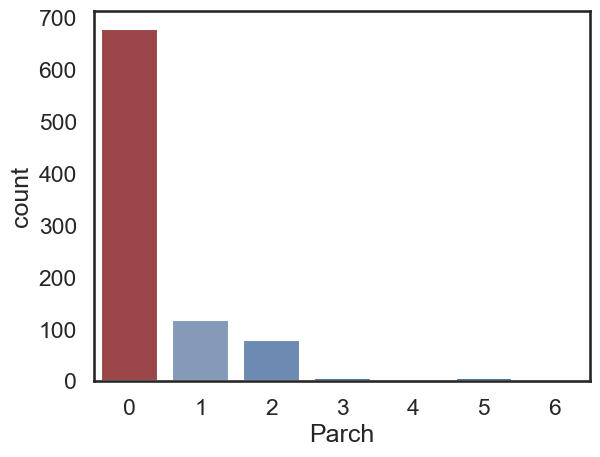

In [28]:
sns.barplot(x = values[2].index, y=values[2],hue = values[2], palette = "vlag",legend = False)
ax.set_title('Parch');

# Feature Sex
* no missing values

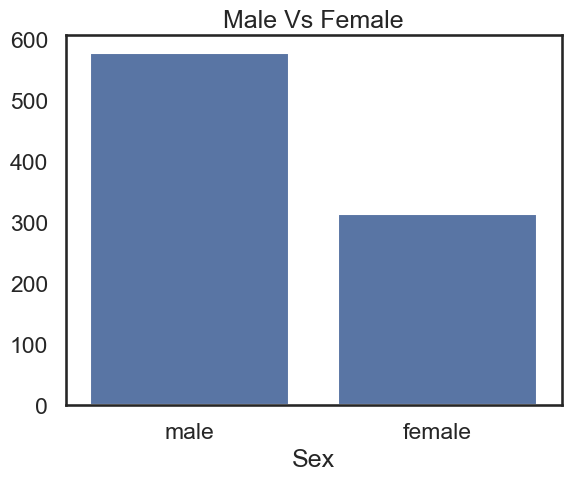

In [29]:
ax = sns.barplot(x = train_data['Sex'].value_counts().index, y=train_data['Sex'].value_counts().values)
ax.set_title('Male Vs Female');

In [30]:
# Relation Sex & Survived ??
df_sex_surv = pd.DataFrame(train_data.groupby('Sex')['Survived'].value_counts())
df_sex_surv = df_sex_surv.reset_index()
display(df_sex_surv)

,Sex,Survived,count
0,female,1,233
1,female,0,81
2,male,0,468
3,male,1,109


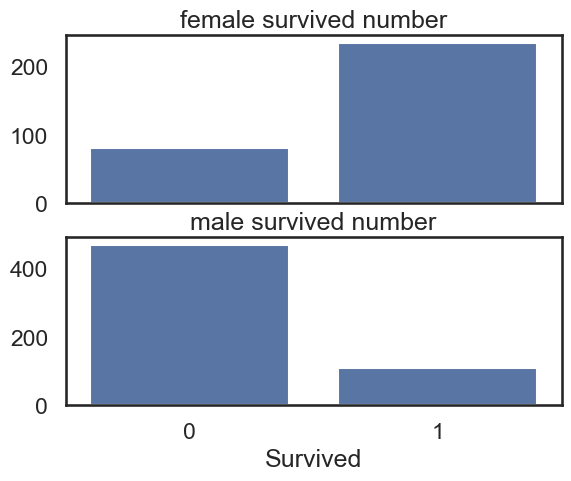

In [31]:
f,(ax1,ax2) = plt.subplots(2,1,sharex = True)
sns.barplot(x=df_sex_surv[df_sex_surv['Sex']=='female']['Survived'], y = df_sex_surv[df_sex_surv['Sex']=='female']['count'],ax = ax1)
ax1.set_title('female survived number')
ax1.set_ylabel('')
sns.barplot(x=df_sex_surv[df_sex_surv['Sex']=='male']['Survived'], y = df_sex_surv[df_sex_surv['Sex']=='male']['count'],ax = ax2)
ax2.set_title('male survived number')
ax2.set_ylabel('');

# Survaived & Sex & Pclass

In [32]:
df_class = pd.DataFrame(train_data.groupby('Survived')[['Pclass','Sex']].value_counts())
df_class.reset_index()

,Survived,Pclass,Sex,count
0,0,3,male,300
1,0,2,male,91
2,0,1,male,77
3,0,3,female,72
4,0,2,female,6
5,0,1,female,3
6,1,1,female,91
7,1,3,female,72
8,1,2,female,70
9,1,3,male,47


# Feature Name, Ticket, Cabin and Embarked
Not too much related to our model, just drop them

# Feature selection 

In [33]:
train_features = ['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
test_features = train_features[1:]
train = train_data[train_features]
test = test_data[test_features]
display(train.head(3))
display(test.head(3))

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,3,male,22.0,1,0
2,1,1,female,38.0,1,0
3,1,3,female,26.0,0,0


,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,
892,3,male,34.5,0,0
893,3,female,47.0,1,0
894,2,male,62.0,0,0


# Models

In [37]:
# Seperate Features and target ('Survived')
target = train['Survived']
train = train.drop('Survived', axis=1)

# 1st Model: Logistic regression classifier

First proposition: to 0 and 1

In [38]:
# copy dataset 
train_p1 = train
test_p1 = test

In [39]:
# Features: Age, Sex, Pclass, SibSp, Parch
# for both train and test dataset

# Change Age to levels => dichotomizing discretizations
age_level_train = pd.cut(train_p1['Age'], bins = age_bin, labels= age_labels)
age_level_test = pd.cut(test_p1['Age'], bins = age_bin, labels= age_labels)
train_p1 = train_p1.join(pd.get_dummies(age_level_train,prefix = "Age_level", dtype = int))
test_p1 = test_p1.join(pd.get_dummies(age_level_test, prefix = "Age_level", dtype = int))

# dichotomizing discretizations:Sex, Pclass, SibSp, Parch 
train_p1 = train_p1.join(pd.get_dummies(train_p1['Sex'],prefix = "Sex", dtype = int))
train_p1 = train_p1.join(pd.get_dummies(train_p1['Pclass'],prefix = "Pclass", dtype = int))
train_p1 = train_p1.join(pd.get_dummies(train_p1['SibSp'],prefix = "SibSp", dtype = int))
train_p1 = train_p1.join(pd.get_dummies(train_p1['Parch'],prefix = "Parch", dtype = int))
test_p1 = test_p1.join(pd.get_dummies(test_p1['Sex'],prefix = "Sex", dtype = int))
test_p1 = test_p1.join(pd.get_dummies(test_p1['Pclass'],prefix = "Pclass", dtype = int))
test_p1 = test_p1.join(pd.get_dummies(test_p1['SibSp'],prefix = "SibSp", dtype = int))
test_p1 = test_p1.join(pd.get_dummies(test_p1['Parch'],prefix = "Parch", dtype = int))

In [40]:
# drop Age, Sex, Pclass, SibSp, Parch
train_p1.drop(['Sex','Age', 'Pclass', 'SibSp','Parch'], axis = 1, inplace = True)
test_p1.drop(['Sex','Age', 'Pclass', 'SibSp','Parch'],axis = 1, inplace = True)

In [41]:
# add Parch_9 to train_p1 set cause there is Parch=9 at test set
train_p1['Parch_9'] = 0
train_p1.head()

,Age_level_teenager,Age_level_adult,Age_level_adult+,Age_level_aged,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,SibSp_0,...,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,1,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_p1, target, 
                                                    random_state=20, 
                                                   test_size=0.2)

Building model: 

In [43]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.model_selection import GridSearchCV

params_lr = {'C': [0.001,0.01,0.1,1,10], 'solver': ['lbfgs','newton-cg','sag']}
clf_lr = LogisticRegression()
grid_lr = GridSearchCV(estimator=clf_lr, param_grid=params_lr, cv = 3)
grid_lr.fit(X_train, y_train)
print(grid_lr.best_params_)

D:\Aconda\envs\py11\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Aconda\envs\py11\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Aconda\envs\py11\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 10, 'solver': 'lbfgs'}


In [44]:
# use the best estimator do predict and check model performance 
pred_lr = grid_lr.best_estimator_.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))
pd.crosstab(y_test, pred_lr, rownames=['real'], colnames =  ['predict'])

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       112
           1       0.86      0.72      0.78        67

    accuracy                           0.85       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



predict,0,1
real,,
0,104,8
1,19,48


In [45]:
clf_lrcv = LogisticRegressionCV()
clf_lrcv.fit(X_train, y_train)
pred_lrcv = clf_lrcv.predict(X_test)
print(classification_report(y_test, pred_lrcv))
pd.crosstab(y_test, pred_lrcv, rownames=['real'], colnames =  ['predict'])

D:\Aconda\envs\py11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Aconda\envs\py11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       112
           1       0.86      0.72      0.78        67

    accuracy                           0.85       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



predict,0,1
real,,
0,104,8
1,19,48


In [46]:
# try to do some real prediction
pred_test_set = grid_lr.best_estimator_.predict(test_p1)
df_results = pd.DataFrame(pred_test_set,index = test_p1.index,columns = ['lr_10_lbfgs'])
df_results.head()

,lr_10_lbfgs
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [48]:
def evaluation_performance(test_data, model_predictions):
    '''
    :test_data: model test-target data like y_test
    :model_predictions: prediction results from model 
    :return: dictionary of a set of evaluation metrics
             'Cross_Table','Classification_Report'
    '''
    from sklearn.metrics import classification_report
    import pandas as pd
    dic_eval_perf = {}
    df_ct = pd.crosstab(test_data,model_predictions, 
                        rownames = ['real'],
                       colnames = ['predict'])
    dic_eval_perf['Cross_Table'] = df_ct
    dic_eval_perf['Classification_Report'] = classification_report(test_data, model_predictions)
    return dic_eval_perf

def prediction_save_csv(results,filepath):
    from pathlib import Path 
    filepath.parent.mkdir(parents=True, exist_ok=True)  
    results.to_csv(filepath) 
    
def save_model_joblib(model, filepath):
    from joblib import dump
    
    from pathlib import Path
    filepath.parent.mkdir(parents = True, exist_ok = True)
    dump(model, filepath)
def save_model_pickle(model, filepath):
    
    import pickle
    from pathlib import Path
    filepath.parent.mkdir(parents = True, exist_ok = True)
    with open(filepath, 'wb') as file: 
        pickle.dump(model, file)

In [50]:
# testset performance evaluation
dic_lr = evaluation_performance(test_result.iloc[:,0].to_numpy(),df_results['lr_10_lbfgs'].to_numpy())
display(dic_lr['Cross_Table'])
print(dic_lr['Classification_Report'])

predict,0,1
real,,
0,261,5
1,6,146


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       266
           1       0.97      0.96      0.96       152

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



In [51]:
# save prediction results
from pathlib import Path  
filepath = Path('D:/Self_Train/Step2_Project/Titanic/results.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_results.to_csv(filepath) 


In [52]:
# save first LR model 
from joblib import dump
import pickle
filepath_model = Path('D:/Self_Train/Step2_Project/Titanic/models/lr_10_lbfgs.joblib')  
filepath_model.parent.mkdir(parents=True, exist_ok=True)
dump(grid_lr.best_estimator_,filepath_model)
import pickle
filepath_model2 = Path('D:/Self_Train/Step2_Project/Titanic/models/lr_10_lbfgs.pkl')
filepath_model2.parent.mkdir(parents=True, exist_ok=True)
with open(filepath_model2,'wb') as file: 
    pickle.dump(grid_lr.best_estimator_, file)

In [ ]:
# reuse the model
from joblib import load
clf_load = load(filepath_model)
tt = clf.predict(test_p1)


In [53]:
train_p2 = train
test_p2 = test
# change male female to 0 and 1
train_p2 = train_p2.join(pd.get_dummies(train_p2['Sex'], prefix='Sex',dtype = int))
test_p2 = test_p2.join(pd.get_dummies(test_p2['Sex'], prefix='Sex',dtype = int))
train_p2.drop('Sex', axis = 1, inplace = True)
test_p2.drop('Sex',axis = 1, inplace = True)
train_p2.head(3)

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
PassengerId,,,,,,
1,3,22.0,1,0,0,1
2,1,38.0,1,0,1,0
3,3,26.0,0,0,1,0


In [54]:
from sklearn import preprocessing 
scaler_lr= preprocessing.StandardScaler().fit(train_p2)
train_scaler = scaler_lr.transform(train_p2)
test_scaler = scaler_lr.transform(test_p2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_scaler,target, 
                                                   test_size=0.2, 
                                                   random_state=20)

In [55]:
params_lr = {'C': [0.001,0.01,0.1,1,10], 'solver': ['lbfgs','newton-cg','sag']}
clf_lr = LogisticRegression()
grid_lr = GridSearchCV(estimator=clf_lr, param_grid=params_lr, cv =3)
grid_lr.fit(X_train,y_train)
print(grid_lr.best_params_)

{'C': 0.1, 'solver': 'lbfgs'}


In [56]:
# use the best estimator do predict and check model performance 
pred_lr = grid_lr.best_estimator_.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))
pd.crosstab(y_test, pred_lr, rownames=['real'], colnames =  ['predict'])

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       112
           1       0.84      0.70      0.76        67

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



predict,0,1
real,,
0,103,9
1,20,47


In [57]:
clf_lrcv = LogisticRegressionCV()
clf_lrcv.fit(X_train, y_train)
pred_lrcv = clf_lrcv.predict(X_test)
print(classification_report(y_test, pred_lrcv))
pd.crosstab(y_test, pred_lrcv, rownames=['real'], colnames =  ['predict'])

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       112
           1       0.84      0.69      0.75        67

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



predict,0,1
real,,
0,103,9
1,21,46


In [58]:
# try to do some real prediction
pred_test_set = grid_lr.best_estimator_.predict(test_p2)
df_results['lr_0.1_lbfgs'] = pred_test_set
df_results.head()

D:\Aconda\envs\py11\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,lr_10_lbfgs,lr_0.1_lbfgs
PassengerId,,
892,0,0
893,1,0
894,0,0
895,0,0
896,1,0


In [59]:
filepath = Path('D:/Self_Train/Step2_Project/Titanic/results.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_results.to_csv(filepath) 

In [60]:
# testset performance evaluation
dic_lr2 = evaluation_performance(test_result.iloc[:,0].to_numpy(),df_results['lr_0.1_lbfgs'].to_numpy())
display(dic_lr2['Cross_Table'])
print(dic_lr2['Classification_Report'])

D:\Aconda\envs\py11\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Aconda\envs\py11\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Aconda\envs\py11\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


predict,0
real,
0,266
1,152


              precision    recall  f1-score   support

           0       0.64      1.00      0.78       266
           1       0.00      0.00      0.00       152

    accuracy                           0.64       418
   macro avg       0.32      0.50      0.39       418
weighted avg       0.40      0.64      0.49       418



# Decision tree

In [62]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

train_dt = train
test_dt = test
train_dt = train_dt.join(pd.get_dummies(train_dt['Sex'],prefix='Sex',dtype= int))
test_dt = test_dt.join(pd.get_dummies(test_dt['Sex'],prefix='Sex',dtype= int))
train_dt.drop('Sex',axis =1, inplace = True)
test_dt.drop('Sex',axis =1, inplace = True)
train_dt.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
PassengerId,,,,,,
1,3,22.0,1,0,0,1
2,1,38.0,1,0,1,0
3,3,26.0,0,0,1,0
4,1,35.0,1,0,1,0
5,3,35.0,0,0,0,1


In [63]:
X_train,X_test, y_train, y_test = train_test_split(train_dt, target, 
                                                  test_size = 0.2,
                                                  random_state= 20)
params_dt = {'criterion': ['entropy','gini'],'max_depth':[1,2,3,4,5]}
clf_dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(estimator = clf_dt, param_grid=params_dt)
grille = grid_dt.fit(X_train,y_train)
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params','mean_test_score']])
print(grille.best_params_)


                                     params  mean_test_score
0  {'criterion': 'entropy', 'max_depth': 1}         0.775327
1  {'criterion': 'entropy', 'max_depth': 2}         0.782271
2  {'criterion': 'entropy', 'max_depth': 3}         0.771112
3  {'criterion': 'entropy', 'max_depth': 4}         0.797813
4  {'criterion': 'entropy', 'max_depth': 5}         0.786556
5     {'criterion': 'gini', 'max_depth': 1}         0.775327
6     {'criterion': 'gini', 'max_depth': 2}         0.782271
7     {'criterion': 'gini', 'max_depth': 3}         0.775337
8     {'criterion': 'gini', 'max_depth': 4}         0.797764
9     {'criterion': 'gini', 'max_depth': 5}         0.794977
{'criterion': 'entropy', 'max_depth': 4}


In [64]:
# feature importance 
feats = {}
for feature, importance in zip(train_dt.columns, grille.best_estimator_.feature_importances_):
    feats[feature] = importance
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0:'Importance'})
importances.sort_values(by= 'Importance', ascending=False).head(6)

,Importance
Sex_male,0.478422
Pclass,0.281966
Age,0.148449
SibSp,0.091163
Parch,0.000000
Sex_female,0.000000


In [65]:
pred_dt = grille.best_estimator_.predict(X_test)
ef_dt = evaluation_performance(y_test,pred_dt)
print('cross table:')
display(ef_dt['Cross_Table'])
print('classification report:')
print(ef_dt['Classification_Report'])
      

cross table:


predict,0,1
real,,
0,105,7
1,17,50


classification report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       112
           1       0.88      0.75      0.81        67

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179



In [66]:
df_results['dt_entropy_4']= grille.best_estimator_.predict(test_dt)
df_results.head()

,lr_10_lbfgs,lr_0.1_lbfgs,dt_entropy_4
PassengerId,,,
892,0,0,0
893,1,0,0
894,0,0,0
895,0,0,0
896,1,0,1


In [67]:
prediction_save_csv(df_results,filepath)

In [68]:
filepath_model_dt = Path('D:/Self_Train/Step2_Project/Titanic/models/dt_entropy_4.joblib')  
save_model_joblib(grille.best_estimator_,filepath_model_dt)

In [70]:
# testset performance evaluation
dic_dt = evaluation_performance(test_result.iloc[:,0].to_numpy(),df_results['dt_entropy_4'].to_numpy())
display(dic_dt['Cross_Table'])
print(dic_dt['Classification_Report'])

predict,0,1
real,,
0,254,12
1,6,146


              precision    recall  f1-score   support

           0       0.98      0.95      0.97       266
           1       0.92      0.96      0.94       152

    accuracy                           0.96       418
   macro avg       0.95      0.96      0.95       418
weighted avg       0.96      0.96      0.96       418



# Random forest

In [71]:
from sklearn import ensemble

train_rf = train
test_rf = test
train_rf = train_rf.join(pd.get_dummies(train_rf['Sex'],prefix='Sex',dtype= int))
test_rf = test_rf.join(pd.get_dummies(test_rf['Sex'],prefix='Sex',dtype= int))
train_rf.drop('Sex',axis =1, inplace = True)
test_rf.drop('Sex',axis =1, inplace = True)
train_rf.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
PassengerId,,,,,,
1,3,22.0,1,0,0,1
2,1,38.0,1,0,1,0
3,3,26.0,0,0,1,0
4,1,35.0,1,0,1,0
5,3,35.0,0,0,0,1


In [72]:
X_train,X_test, y_train, y_test = train_test_split(train_rf, target, 
                                                  test_size = 0.2,
                                                  random_state= 20)
clf_rf = ensemble.RandomForestClassifier(n_jobs=-1, random_state=321)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=321)

In [73]:
pred_rf = clf_rf.predict(X_test)
ef_rf = evaluation_performance(y_test,pred_rf)
print('cross table:')
display(ef_rf['Cross_Table'])
print('classification report:')
print(ef_rf['Classification_Report'])

cross table:


predict,0,1
real,,
0,97,15
1,16,51


classification report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       112
           1       0.77      0.76      0.77        67

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [74]:
df_results['rf']= clf_rf.predict(test_rf)
df_results.head()

,lr_10_lbfgs,lr_0.1_lbfgs,dt_entropy_4,rf
PassengerId,,,,
892,0,0,0,0
893,1,0,0,0
894,0,0,0,1
895,0,0,0,1
896,1,0,1,0


In [75]:
prediction_save_csv(df_results,filepath)

In [76]:
filepath_model_rf = Path('D:/Self_Train/Step2_Project/Titanic/models/random_forest.joblib')  
save_model_joblib(clf_rf,filepath_model_rf)

In [77]:
# testset performance evaluation
dic_rf = evaluation_performance(test_result.iloc[:,0].to_numpy(),df_results['rf'].to_numpy())
display(dic_rf['Cross_Table'])
print(dic_rf['Classification_Report'])

predict,0,1
real,,
0,215,51
1,54,98


              precision    recall  f1-score   support

           0       0.80      0.81      0.80       266
           1       0.66      0.64      0.65       152

    accuracy                           0.75       418
   macro avg       0.73      0.73      0.73       418
weighted avg       0.75      0.75      0.75       418

